ML Course, Bogotá, Colombia  (&copy; Josh Bloom; June 2019)

In [1]:
%run ../talktools.py

<div class="alert alert-info">sklearn is not built for deep/complex networks such as required in covnets (as we'll see later on). We must go to specialized software (and potentially specialized hardware)</div>


# Deep Learning Frameworks

Almost all frameworks written in low-level C++/C with Python (or other scripting bindings)

### Low-level frameworks

   - Tensorflow (Google) Nov 2015
   - Theano
   - Caffe (Berkeley)
   - Torch (Lua)
   - pytorch (Python)
   - CNTK (Microsoft)
   - Chainer
   - PaddlePaddle (Baidu) Aug 2016
   
### High level frameworks (Python)

   - Keras (atop Tensorflow, Theano)
   - TFLearn 
   - nolearn
   - SkFlow (part of tensorflow)
   - [Lasagne](http://lasagne.readthedocs.io/en/latest/index.html) (atop Theano)
   
<img src="https://pbs.twimg.com/media/DX0lfBNU8AEs8KG.png:large" width="75%">
Source: https://twitter.com/fchollet/status/971863128341323776

<blockquote class="twitter-tweet" data-lang="en"><p lang="en" dir="ltr">TensorFlow is the platform of choice for deep learning in the research community. These are deep learning framework mentions on arXiv over the past 3 months <img src="https://pbs.twimg.com/media/DXy_uc0VAAAIhKG.jpg:small">

&mdash; François Chollet (@fchollet) <a href="https://twitter.com/fchollet/status/971863128341323776?ref_src=twsrc%5Etfw">March 8, 2018</a></blockquote>
<script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script>


see also: https://github.com/mbadry1/Top-Deep-Learning

# Keras

Let's load up the California housing data as in the previous notebook.

In [45]:
import math

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

from sklearn import datasets
from sklearn.preprocessing import StandardScaler  


cal_house = datasets.california_housing
cal_data = cal_house.fetch_california_housing()
X = cal_data['data']   # 8 features 
Y = cal_data['target'] # response (median house price)

half = math.floor(len(Y)/2)
train_X = X[:half]
train_Y = Y[:half]
test_X = X[half:]
test_Y = Y[half:]


scaler = StandardScaler()  

# Don't cheat - fit only on training data
scaler.fit(train_X)  
train_X = scaler.transform(train_X)  

# apply same transformation to test data
test_X = scaler.transform(test_X)

In [46]:
num_input_features = train_X.shape[1]
print(f'number of input features = {num_input_features}')

number of input features = 8


In [47]:
import datetime, os

import tensorflow.keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
import tensorflow as tf

# Print keras version
print(tensorflow.keras.__version__)

2.2.4-tf


In [5]:
def nn_clf():
    
    model = Sequential()
    model.add(Dense(10, input_shape=(num_input_features,), 
                      activation="relu", kernel_initializer='random_uniform'))
    model.add(Dense(10,  activation="relu", kernel_initializer='random_uniform'))
    model.add(Dense(5,  activation="relu", kernel_initializer='random_uniform'))
    model.add(Dense(1, activation="linear", kernel_initializer='random_uniform'))
    model.compile(optimizer='adam', loss='mean_squared_error',  metrics=['mae',"mse"])
    return model

In [6]:
model = nn_clf()

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                90        
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 6         
Total params: 261
Trainable params: 261
Non-trainable params: 0
_________________________________________________________________


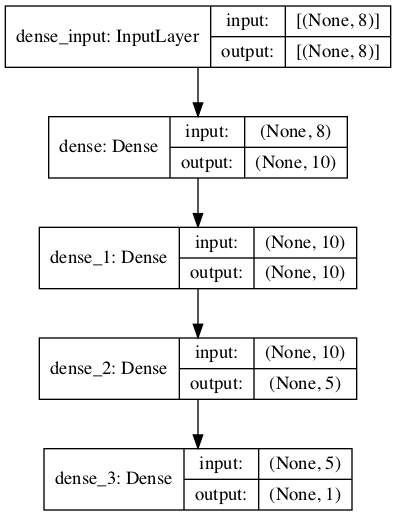

In [7]:
from tensorflow.keras.utils import plot_model

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

from IPython.display import Image
Image("model_plot.png")

In [8]:
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score, KFold

clf = KerasRegressor(build_fn=nn_clf, batch_size=32, epochs=50)
clf.fit(train_X, train_Y)

Using TensorFlow backend.


Epoch 1/50
10320/10320 [==============================] - 0s 44us/sample - loss: 2.3098 - mae: 1.1100 - mse: 2.3098
Epoch 2/50
10320/10320 [==============================] - 0s 30us/sample - loss: 0.5048 - mae: 0.5141 - mse: 0.5048
Epoch 3/50
10320/10320 [==============================] - 0s 44us/sample - loss: 0.4224 - mae: 0.4682 - mse: 0.4224
Epoch 4/50
10320/10320 [==============================] - 1s 51us/sample - loss: 0.3962 - mae: 0.4531 - mse: 0.3962
Epoch 5/50
10320/10320 [==============================] - 0s 34us/sample - loss: 0.3875 - mae: 0.4484 - mse: 0.3875
Epoch 6/50
10320/10320 [==============================] - 0s 29us/sample - loss: 0.3794 - mae: 0.4428 - mse: 0.3794
Epoch 7/50
10320/10320 [==============================] - 0s 29us/sample - loss: 0.3748 - mae: 0.4388 - mse: 0.3748
Epoch 8/50
10320/10320 [==============================] - 0s 25us/sample - loss: 0.3696 - mae: 0.4359 - mse: 0.3696
Epoch 9/50
10320/10320 [==============================] - 0s 28us/sample

MSE 0.5525607476476062


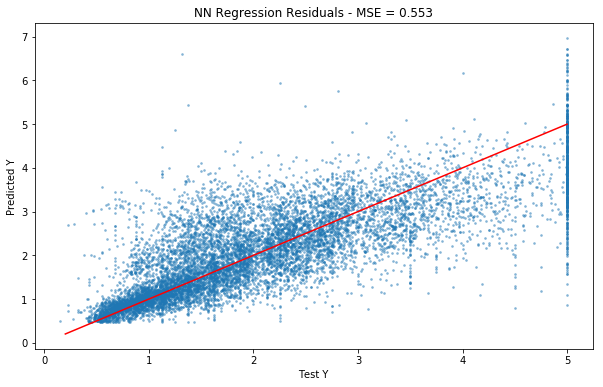

In [9]:
# how well did we do?
import numpy as np
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test_Y, clf.predict(test_X)) ; print("MSE",mse)

plt.figure(figsize=(10,6))
plt.title("NN Regression Residuals - MSE = %.3f" % mse)
plt.scatter(test_Y,clf.predict(test_X),alpha=0.4,s=3)
plt.xlabel("Test Y")
plt.ylabel("Predicted Y")
plt.plot([0.2,5],[0.2,5],c="r")

### A More Complete Example

We want to train and make some decisions of when to stop based on `validation` data. Ultimately, we'd like to see how well our model would do on truly new data (`test`).


In [48]:
train_percentage, valid_percentage, test_percentage = (0.90,0.05,0.05)

In [49]:
from sklearn.model_selection import train_test_split

rnd = np.random.RandomState(42)

# make an array with the indices of all the rows in the dataset
ind_arr = np.arange(X.shape[0])
rnd.shuffle(ind_arr)

train_ind, tmp = train_test_split(ind_arr, train_size=train_percentage, random_state=rnd)
valid_ind, test_ind = train_test_split(tmp, 
                                                          train_size=valid_percentage/(valid_percentage + test_percentage), 
                                                          random_state=rnd)

/Users/jbloom/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


Let's make sure that we're getting all the indicies

In [50]:
assert np.all(np.array(sorted(list(train_ind) + list(valid_ind) + list(test_ind)))  == sorted(ind_arr))

Now let's scale the inputs

In [51]:
scaler = StandardScaler()  

train_X = X[train_ind]
# Don't cheat - fit only on training data
scaler.fit(train_X)  
train_X = scaler.transform(train_X)  

# apply same transformation to test, validation data
test_X = scaler.transform(X[test_ind])
valid_X = scaler.transform(X[valid_ind])

train_y = Y[train_ind] ; test_y = Y[test_ind] ; valid_y = Y[valid_ind]

assert train_y.shape[0] == train_X.shape[0]
assert test_y.shape[0] == test_X.shape[0]
assert valid_y.shape[0] == valid_X.shape[0]

In [14]:
model = Sequential()
model.add(Dense(10, input_shape=(num_input_features,), 
                  activation="relu", kernel_initializer='random_uniform'))
model.add(Dense(10,  activation="relu", kernel_initializer='random_uniform'))
model.add(Dense(5,  activation="relu", kernel_initializer='random_uniform'))
model.add(Dense(1, activation="linear", kernel_initializer='random_uniform'))

The `Model.compile` method in `keras` has a number of input parameters:

```python
compile(optimizer, loss=None, metrics=None, loss_weights=None, sample_weight_mode=None, weighted_metrics=None, target_tensors=None)
```
Usually, you'll set the `optimizer`, `loss`, and `metrics`.

https://keras.io/models/model/

In [15]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 10)                90        
_________________________________________________________________
dense_9 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_10 (Dense)             (None, 5)                 55        
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 6         
Total params: 261
Trainable params: 261
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.compile(optimizer='adam', loss='mean_squared_error',  metrics=['mae',"mse"])

In [17]:
import datetime
import os

from tensorflow.keras.callbacks import EarlyStopping, CSVLogger, \
                                                ReduceLROnPlateau, ModelCheckpoint, TensorBoard

try:
    os.mkdir('nn_results')
except:
    pass

batch_size=64
num_epochs = 200

run_time_string = datetime.datetime.utcnow().isoformat(timespec='minutes')

# define path to save model
model_path = f'nn_results/colombia_nn_{run_time_string}.h5'
print(f"Training ... {model_path}")

# Tensorboard is a project which can ingest learning logs for interactive display...more on that later.
tb = TensorBoard(log_dir='nn_results', histogram_freq=0,
                 write_graph=True, 
                 write_grads=False, 
                 write_images=False, 
                 embeddings_freq=0, 
                 embeddings_layer_names=None, 
                 embeddings_metadata=None, embeddings_data=None)

reduce_lr = ReduceLROnPlateau(monitor='val_mse', factor=0.75,
                              patience=3, min_lr=1e-6, verbose=1, cooldown=0)

csv_logger = CSVLogger(f'nn_results/training_{run_time_string}.log')

earlystop = EarlyStopping(monitor='val_mse', min_delta=0.001, patience=10, \
                          verbose=1, mode='auto')

model_check = ModelCheckpoint(model_path,
        monitor='val_mse', 
        save_best_only=True, 
        mode='min',
        verbose=1)

Training ... nn_results/colombia_nn_2019-06-06T03:34.h5


The `Model.fit` method:

```python
fit(x=None, y=None, batch_size=None, epochs=1, verbose=1, callbacks=None, validation_split=0.0, validation_data=None, shuffle=True, class_weight=None, sample_weight=None, initial_epoch=0, steps_per_epoch=None, validation_steps=None, validation_freq=1)
```

In [18]:
history = model.fit(x=train_X, y=train_y,
               epochs=num_epochs,
               validation_data=(valid_X, valid_y),
               verbose=1, shuffle=True,
               callbacks=[csv_logger, earlystop, model_check, tb])

Train on 18576 samples, validate on 1032 samples
Epoch 1/200
17504/18576 [===========================>..] - ETA: 0s - loss: 1.6617 - mae: 0.9102 - mse: 1.6617
Epoch 00001: val_mse improved from inf to 0.58637, saving model to nn_results/colombia_nn_2019-06-06T03:34.h5
18576/18576 [==============================] - 1s 73us/sample - loss: 1.5965 - mae: 0.8887 - mse: 1.5965 - val_loss: 0.5864 - val_mae: 0.5483 - val_mse: 0.5864
Epoch 2/200
18528/18576 [============================>.] - ETA: 0s - loss: 0.4670 - mae: 0.4936 - mse: 0.4670
Epoch 00002: val_mse improved from 0.58637 to 0.47217, saving model to nn_results/colombia_nn_2019-06-06T03:34.h5
18576/18576 [==============================] - 1s 38us/sample - loss: 0.4664 - mae: 0.4933 - mse: 0.4664 - val_loss: 0.4722 - val_mae: 0.4804 - val_mse: 0.4722
Epoch 3/200
17248/18576 [==========================>...] - ETA: 0s - loss: 0.4256 - mae: 0.4656 - mse: 0.4256
Epoch 00003: val_mse improved from 0.47217 to 0.44702, saving model to nn_res

18400/18576 [============================>.] - ETA: 0s - loss: 0.3485 - mae: 0.4124 - mse: 0.3485
Epoch 00023: val_mse did not improve from 0.37531
18576/18576 [==============================] - 1s 29us/sample - loss: 0.3477 - mae: 0.4119 - mse: 0.3477 - val_loss: 0.3810 - val_mae: 0.4210 - val_mse: 0.3810
Epoch 24/200
18080/18576 [============================>.] - ETA: 0s - loss: 0.3496 - mae: 0.4120 - mse: 0.3496
Epoch 00024: val_mse improved from 0.37531 to 0.37424, saving model to nn_results/colombia_nn_2019-06-06T03:34.h5
18576/18576 [==============================] - 1s 28us/sample - loss: 0.3481 - mae: 0.4115 - mse: 0.3481 - val_loss: 0.3742 - val_mae: 0.4221 - val_mse: 0.3742
Epoch 25/200
17824/18576 [===========================>..] - ETA: 0s - loss: 0.3469 - mae: 0.4102 - mse: 0.3469
Epoch 00025: val_mse did not improve from 0.37424
18576/18576 [==============================] - 1s 29us/sample - loss: 0.3493 - mae: 0.4120 - mse: 0.3493 - val_loss: 0.3790 - val_mae: 0.4277 - va

In [19]:
!ls nn_results/

20190605-145816                 train
20190605-150530                 training_2019-06-05T19:58.log
colombia_nn_2019-06-05T19:58.h5 training_2019-06-05T20:05.log
colombia_nn_2019-06-05T20:05.h5 training_2019-06-06T03:30.log
colombia_nn_2019-06-06T03:30.h5 training_2019-06-06T03:34.log
colombia_nn_2019-06-06T03:34.h5 validation


Let's look at the history of the training results:

In [20]:
lastest_log_file = !ls -t1 nn_results/training* | head -1
hist_df = pd.read_csv(lastest_log_file[0])
hist_df

,epoch,loss,mae,mse,val_loss,val_mae,val_mse
0,0,1.596539,0.888739,1.596539,0.586370,0.548340,0.586370
1,1,0.466367,0.493266,0.466367,0.472171,0.480400,0.472171
2,2,0.426690,0.465506,0.426690,0.447018,0.463862,0.447018
3,3,0.413793,0.457903,0.413793,0.440789,0.463093,0.440789
4,4,0.405770,0.454047,0.405770,0.427165,0.470469,0.427165
5,5,0.396292,0.449717,0.396292,0.420796,0.460434,0.420796
6,6,0.388721,0.446816,0.388721,0.411122,0.452769,0.411122
7,7,0.383121,0.442352,0.383121,0.410318,0.448044,0.410318
8,8,0.377214,0.439177,0.377214,0.402564,0.444460,0.402564
9,9,0.371400,0.434629,0.371400,0.395913,0.440872,0.395913


This is also available in the return value from `.fit`:

In [21]:
history.history.keys()

dict_keys(['loss', 'mae', 'mse', 'val_loss', 'val_mae', 'val_mse'])

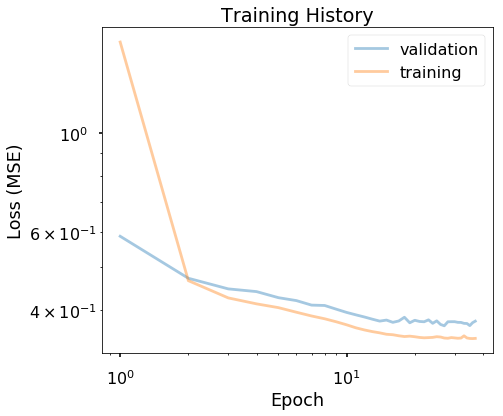

In [22]:
import seaborn as sns
sns.set_context("poster")
plt.figure(figsize=(7,6))
plt.title("Training History")
plt.plot(hist_df.index + 1,hist_df["val_mse"] ,alpha=0.4, label="validation")
plt.plot(hist_df.index + 1,hist_df["mse"] ,alpha=0.4, label="training")

plt.xlabel("Epoch")
plt.ylabel("Loss (MSE)")
plt.loglog()
plt.legend()

Take a look at the `tensorboard` notebook as well...

Let's take a look at the predictions on the test set

In [40]:
# reload the best model
from tensorflow.keras.models import load_model
import tensorflow as tf

model = load_model("nn_results/colombia_nn_2019-06-06T03:34.h5")

In [54]:
pred_y = model.predict(test_X)
pred_y

array([[1.6982787],
       [4.5271378],
       [0.8161887],
       ...,
       [1.9181906],
       [1.5341332],
       [1.3493855]], dtype=float32)

MSE 0.3622807742392857


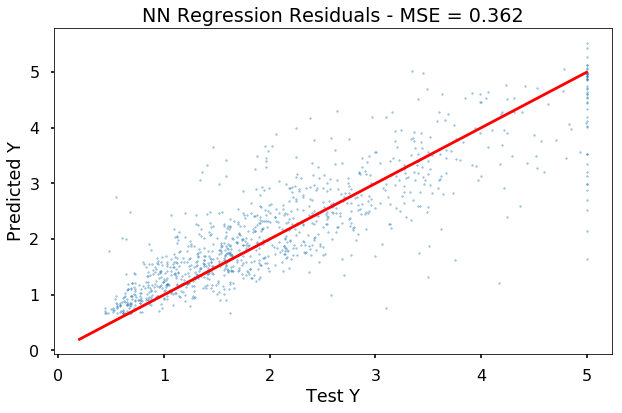

In [55]:
# how well did we do?
import numpy as np
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test_y, pred_y[:,0]); print("MSE",mse)

plt.figure(figsize=(10,6))
plt.title("NN Regression Residuals - MSE = %.3f" % mse)
plt.scatter(test_y,pred_y[:,0] ,alpha=0.4,s=3)
plt.xlabel("Test Y")
plt.ylabel("Predicted Y")
plt.plot([0.2,5],[0.2,5],c="r")

How did we do compared to the validation and training data?